In [1]:
!pip install pystan~=2.14
!pip install prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [4]:
data1 = pd.read_csv(r"C:/Users/Ravi/Desktop/Chicago_Crime_dset/Chicago_Crimes_2005_to_2007.csv",low_memory=False)

In [5]:
data2 = pd.read_csv(r"C:/Users/Ravi/Desktop/Chicago_Crime_dset/Chicago_Crimes_2008_to_2011.csv",low_memory=False)

In [6]:
data3 = pd.read_csv(r"C:/Users/Ravi/Desktop/Chicago_Crime_dset/Chicago_Crimes_2012_to_2017.csv",low_memory=False)

In [7]:
data = pd.concat([data1,data2,data3])

**Brief overview about colums**:

ID: Unique identifier for the crime incident.
Case Number: Records Division Number assigned to the incident.
Date: Date when the incident occurred.
Block: Block address of the incident.
IUCR: The Illinois Uniform Crime Reporting code.
Primary Type: The primary description of the crime according to the IUCR code.
Description: Secondary description of the incident.
Location Description: Description of the location where the incident occurred.
Arrest: True or False if the suspect was arrested.
Domestic: True or False if the incident was domestic-related.
Beat: A beat is the smallest police geographic area; each beat has a dedicated police beat car.
District: District where the incident occurred.
Ward: The City Council district where the incident occurred.
Community Area: Chicago has 77 community areas.
FBI Code: Crime classification according to the FBI’s National Incident-Based Reporting System (NIBRS).
X Coordinate: The x-coordinate of the incident.
Y Coordinate: The y-coordinate of the incident.
Year: Year the incident occurred.
Updated On: Date and time the record was last updated.
Latitude: The latitude of the incident.
Longitude: The longitude of the incident.
Location: The location of the incident.

**1. Display Top 5 Rows of The Dataset**

In [8]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Unnamed: 23
0,0,4673626,HM274058,2006-4-2 13:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,26,1136872.0,1936499.0,2006,2016-4-15 8:55,41.981913,-87.771996,"(41.981912692, -87.771996382)",NaN
1,1,4673627,HM202199,2006-2-26 13:40,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,42.0,18,1181027.0,1861693.0,2006,2016-4-15 8:55,41.775733,-87.611920,"(41.775732538, -87.611919814)",NaN
2,2,4673628,HM113861,2006-1-8 23:16,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,69.0,04A,1186023.0,1859609.0,2006,2016-4-15 8:55,41.769897,-87.593671,"(41.769897392, -87.593670899)",NaN
3,4,4673629,HM274049,2006-4-5 18:45,061XX W NEWPORT AVE,460,BATTERY,SIMPLE,RESIDENCE,False,...,17.0,08B,1134772.0,1922299.0,2006,2016-4-15 8:55,41.942984,-87.780057,"(41.942984005, -87.780056951)",NaN
4,5,4673630,HM187120,2006-2-17 21:03,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,65.0,18,1152412.0,1864560.0,2006,2016-4-15 8:55,41.784211,-87.716745,"(41.784210853, -87.71674491)",NaN


**2. Check Last 5 Rows of The Dataset**

In [9]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Unnamed: 23
1048570,3384640,10111143,HY299674,2015-6-13 16:12,036XX W GRENSHAW ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,29.0,14,1152278.0,1894797.0,2015,2015-8-17 15:03,41.867188,-87.716440,"(41.86718783, -87.71644019)",NaN
1048571,3384641,10111144,HY300084,2015-6-13 21:30,014XX S MUSEUM CAMPUS DR,870,THEFT,POCKET-PICKING,STREET,False,...,33.0,6,1179970.0,1893558.0,2015,2015-8-17 15:03,41.863197,-87.614818,"(41.863196881, -87.614817819)",NaN
1048572,3384642,10111146,HY300059,2015-6-13 21:40,023XX W LAWRENCE AVE,460,BATTERY,SIMPLE,SIDEWALK,True,...,4.0,08B,1159650.0,1931817.0,2015,2015-8-17 15:03,41.968625,-87.688354,"(41.96862488, -87.688354349)",NaN
1048573,3384643,10111147,HY299981,2015-6-13 20:40,051XX W THOMAS ST,313,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,SIDEWALK,False,...,25.0,3,1141687.0,1906835.0,2015,2015-8-17 15:03,41.900424,-87.755024,"(41.900423863, -87.755023892)",NaN
1048574,3384644,10111148,HY300058,2015-6-13 22:00,004XX N CENTRAL PARK BLVD,460,BATTERY,SIMPLE,BRIDGE,False,...,23.0,08B,1152273.0,1902600.0,2015,2015-8-17 15:03,41.888600,-87.716253,"(41.888600199, -87.716252586)",NaN


**3. Shape(Number of Rows And Number of Columns)**

In [10]:
data.shape

(3145725, 24)

In [11]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 3145725
Number of Columns 24


**4.Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145725 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
 23  Unnamed

**5.Null Values In The Dataset**

In [13]:
data.isnull().sum()

Unnamed: 0                    0
ID                            0
Case Number                   3
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description        677
Arrest                        0
Domestic                      0
Beat                          0
District                     44
Ward                         42
Community Area              787
FBI Code                      0
X Coordinate              26292
Y Coordinate              26292
Year                          0
Updated On                    0
Latitude                  26292
Longitude                 26292
Location                  26292
Unnamed: 23             3145724
dtype: int64

**6. Select Only The Necessary Columns**

In [14]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Unnamed: 23'],
      dtype='object')

In [15]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

In [16]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,2006-4-2 13:00,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,2006-2-26 13:40,NARCOTICS,SIDEWALK,True,False
2,4673628,2006-1-8 23:16,ASSAULT,OTHER,False,False
3,4673629,2006-4-5 18:45,BATTERY,RESIDENCE,False,False
4,4673630,2006-2-17 21:03,NARCOTICS,ALLEY,True,False


**7.Null Values In The Dataset**

In [17]:
df.isnull().sum()

ID                        0
Date                      0
Primary Type              0
Location Description    677
Arrest                    0
Domestic                  0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145048 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 126.0+ MB


In [22]:
df.Date = pd.to_datetime(df.Date,format = '%Y/%m/%d %H:%M')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145048 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 126.0+ MB


**8.Top 10 Primary Crime Types**

In [24]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

#Crime Count by Primary Type:

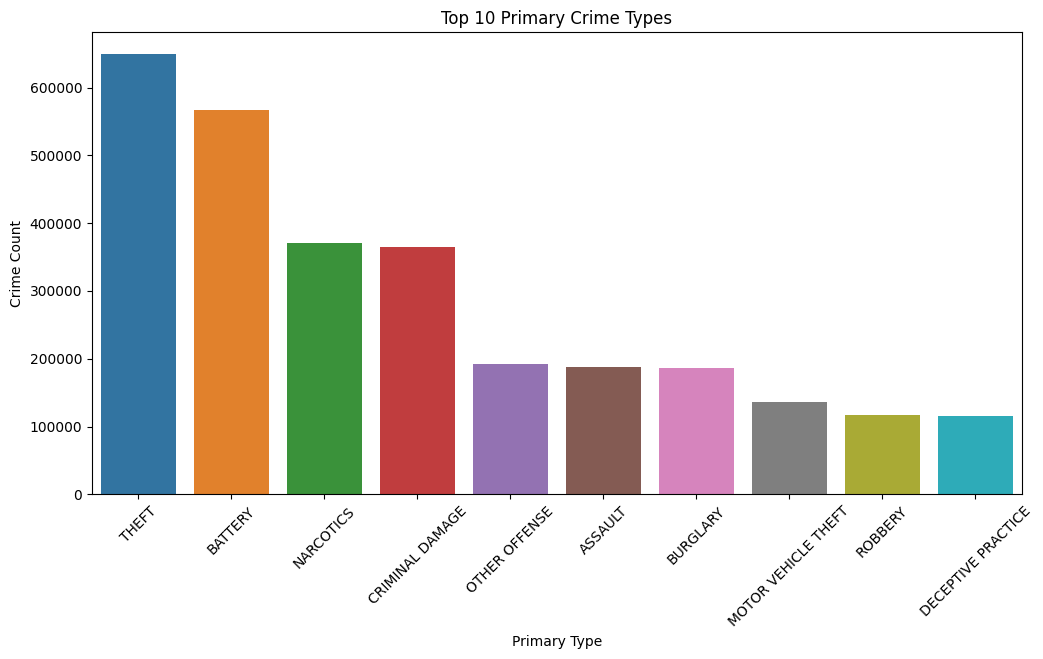

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary Type', order=df['Primary Type'].value_counts().index[:10])
plt.title('Top 10 Primary Crime Types')
plt.xlabel('Primary Type')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()


In [25]:
df['Primary Type'].value_counts().head(10)

THEFT                  648983
BATTERY                566426
NARCOTICS              370999
CRIMINAL DAMAGE        364764
OTHER OFFENSE          191507
ASSAULT                187820
BURGLARY               186261
MOTOR VEHICLE THEFT    136618
ROBBERY                117082
DECEPTIVE PRACTICE     115936
Name: Primary Type, dtype: int64

**9 .How Many Criminals Are Arrested Having Primary Crime type is Theft?** 

In [26]:
df[df['Primary Type']=="THEFT"]['Arrest'].value_counts()

False    574673
True      74310
Name: Arrest, dtype: int64

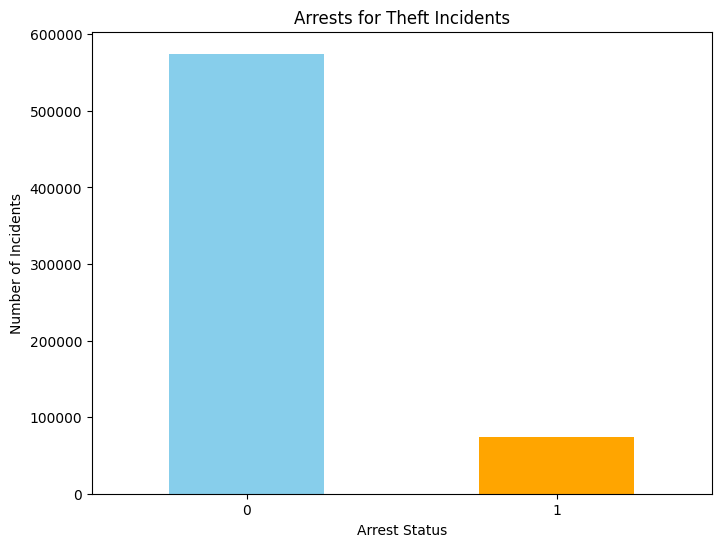

In [67]:
import matplotlib.pyplot as plt

# Filter the dataframe for theft incidents
theft_df = df[df['Primary Type'] == "THEFT"]

# Count the number of arrests and non-arrests
arrest_counts = theft_df['Arrest'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
arrest_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Arrests for Theft Incidents')
plt.xlabel('Arrest Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.show()


**10. Find The Top 10 Crime Location Descriptions**

In [27]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')

#Crime Count by Location Description:

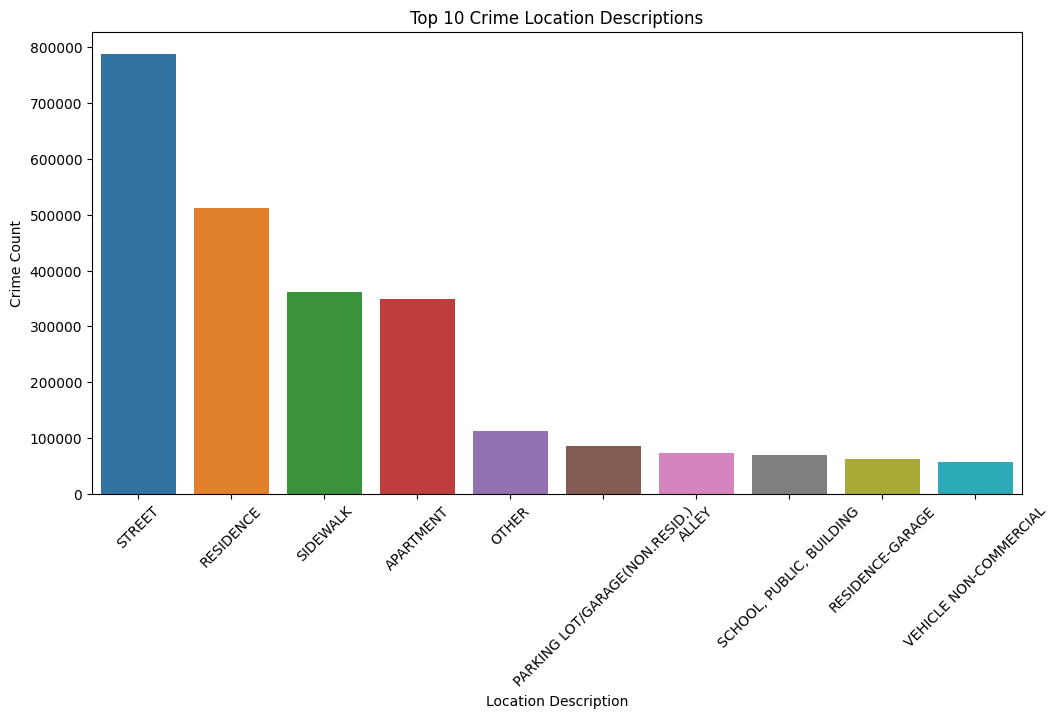

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location Description', order=df['Location Description'].value_counts().index[:10])
plt.title('Top 10 Crime Location Descriptions')
plt.xlabel('Location Description')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()


In [28]:
df['Location Description'].value_counts().head(10)

STREET                            788626
RESIDENCE                         511891
SIDEWALK                          361665
APARTMENT                         349278
OTHER                             111997
PARKING LOT/GARAGE(NON.RESID.)     85384
ALLEY                              72646
SCHOOL, PUBLIC, BUILDING           69590
RESIDENCE-GARAGE                   61606
VEHICLE NON-COMMERCIAL             57131
Name: Location Description, dtype: int64

**11 .How Many of Are Arrested Having Location Type is STREET** 

In [29]:
df[df['Location Description']=="STREET"]['Arrest'].value_counts()

False    559582
True     229044
Name: Arrest, dtype: int64

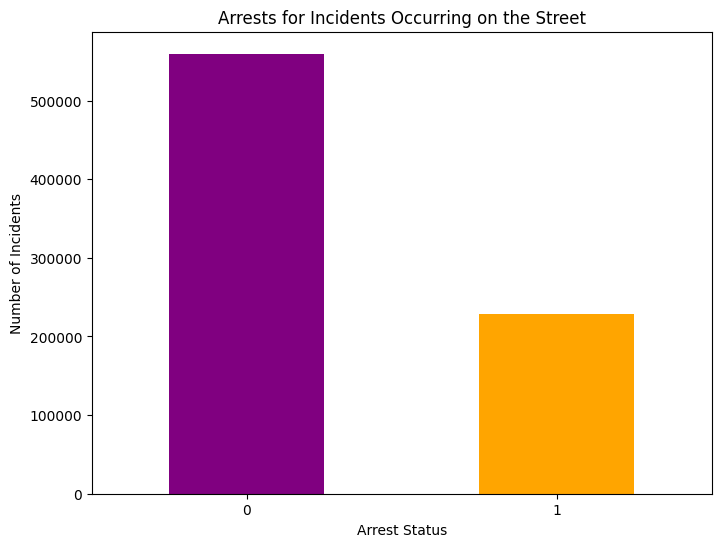

In [70]:
import matplotlib.pyplot as plt

# Filter the dataframe for incidents occurring on the street
street_df = df[df['Location Description'] == "STREET"]

# Count the number of arrests and non-arrests
arrest_counts = street_df['Arrest'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
arrest_counts.plot(kind='bar', color=['purple', 'orange'])
plt.title('Arrests for Incidents Occurring on the Street')
plt.xlabel('Arrest Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.show()


**Arrest Rates By Location** 

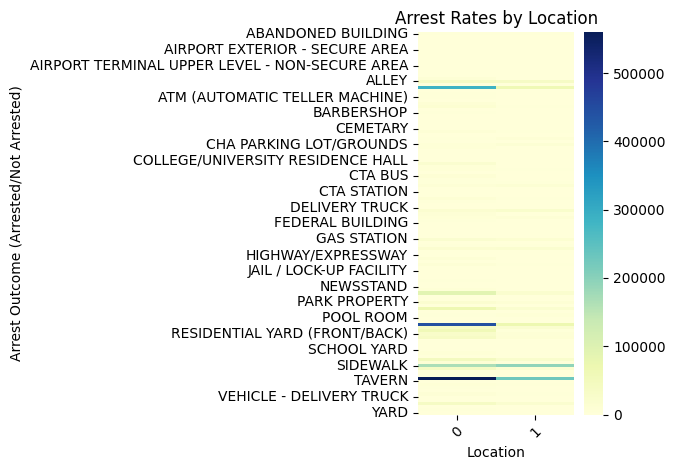

In [69]:
arrest_counts = (
    df.groupby('Location Description')['Arrest'].value_counts().unstack(fill_value=0)
)

# Create the heatmap
sns.heatmap(arrest_counts, cmap='YlGnBu')  
plt.xlabel('Location')
plt.ylabel('Arrest Outcome (Arrested/Not Arrested)')
plt.title('Arrest Rates by Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [30]:
df.index = pd.DatetimeIndex(df.Date)

In [31]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:00,4673627,2006-02-26 13:40:00,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:00,4673630,2006-02-17 21:03:00,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2015-06-13 16:12:00,10111143,2015-06-13 16:12:00,CRIMINAL DAMAGE,APARTMENT,False,True
2015-06-13 21:30:00,10111144,2015-06-13 21:30:00,THEFT,STREET,False,False
2015-06-13 21:40:00,10111146,2015-06-13 21:40:00,BATTERY,SIDEWALK,True,False


Text(0, 0.5, 'Number of Crimes')

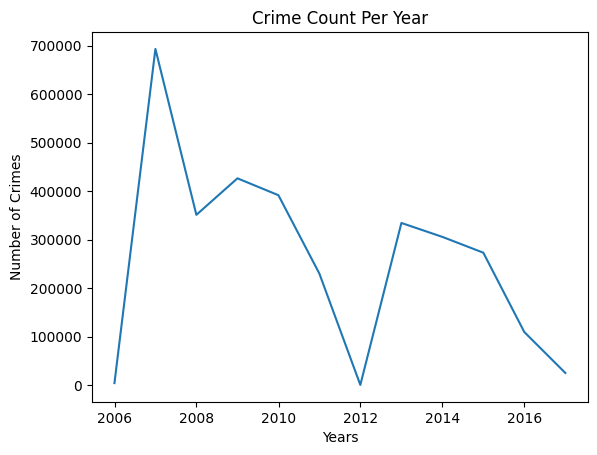

In [32]:
plt.plot(df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

Text(0, 0.5, 'Number of Crimes')

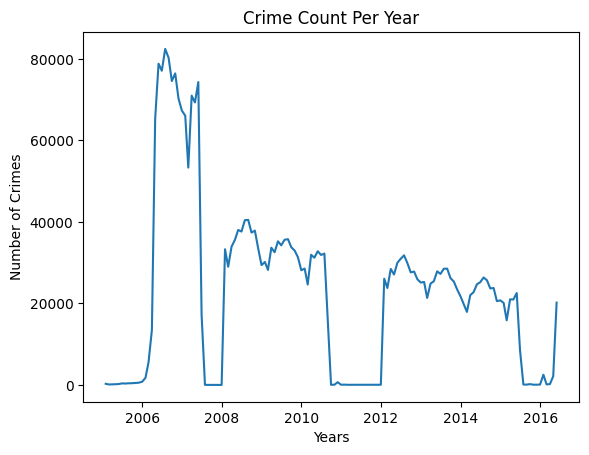

In [33]:
plt.plot(df.resample('M').size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

**Preparing The data**

In [34]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [35]:
df_prophet.columns =['Date','Crime Count']

In [36]:
df_prophet

,Date,Crime Count
0,2005-01-31,282
1,2005-02-28,114
2,2005-03-31,135
3,2005-04-30,186
4,2005-05-31,214
...,...,...
132,2016-01-31,2506
133,2016-02-29,121
134,2016-03-31,211
135,2016-04-30,2130


**Rename The Columns**

In [37]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [38]:
df_prophet

,ds,y
0,2005-01-31,282
1,2005-02-28,114
2,2005-03-31,135
3,2005-04-30,186
4,2005-05-31,214
...,...,...
132,2016-01-31,2506
133,2016-02-29,121
134,2016-03-31,211
135,2016-04-30,2130


**Train The Model**

In [39]:
m = Prophet()
m.fit(df_prophet)

09:35:38 - cmdstanpy - INFO - Chain [1] start processing
09:35:39 - cmdstanpy - INFO - Chain [1] done processing


**Make The Predictions**

In [40]:
pred=m.make_future_dataframe(periods=24,freq='M')
forcast = m.predict(pred)

In [41]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,30785.897153,1813.744020,54016.858901,30785.897153,30785.897153,-2217.459251,-2217.459251,-2217.459251,-2217.459251,-2217.459251,-2217.459251,0.0,0.0,0.0,28568.437902
1,2005-02-28,30678.578503,278.376635,51571.312721,30678.578503,30678.578503,-4572.050308,-4572.050308,-4572.050308,-4572.050308,-4572.050308,-4572.050308,0.0,0.0,0.0,26106.528195
2,2005-03-31,30559.761426,5219.878169,57677.054064,30559.761426,30559.761426,472.911258,472.911258,472.911258,472.911258,472.911258,472.911258,0.0,0.0,0.0,31032.672684
3,2005-04-30,30444.777158,9304.633681,60029.788350,30444.777158,30444.777158,4707.893021,4707.893021,4707.893021,4707.893021,4707.893021,4707.893021,0.0,0.0,0.0,35152.670179
4,2005-05-31,30325.960081,13568.128109,65089.138646,30325.960081,30325.960081,9203.462661,9203.462661,9203.462661,9203.462661,9203.462661,9203.462661,0.0,0.0,0.0,39529.422742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2018-01-31,12044.682104,-16296.529943,34534.295181,12038.943698,12049.774615,-2127.826357,-2127.826357,-2127.826357,-2127.826357,-2127.826357,-2127.826357,0.0,0.0,0.0,9916.855747
157,2018-02-28,11933.634943,-19522.903439,32108.403049,11927.396494,11939.171050,-4690.629210,-4690.629210,-4690.629210,-4690.629210,-4690.629210,-4690.629210,0.0,0.0,0.0,7243.005733
158,2018-03-31,11810.689871,-15126.204239,38003.903292,11804.073733,11816.582137,415.580951,415.580951,415.580951,415.580951,415.580951,415.580951,0.0,0.0,0.0,12226.270822
159,2018-04-30,11691.710769,-10435.483056,40852.994037,11684.775665,11698.075739,4875.913882,4875.913882,4875.913882,4875.913882,4875.913882,4875.913882,0.0,0.0,0.0,16567.624651


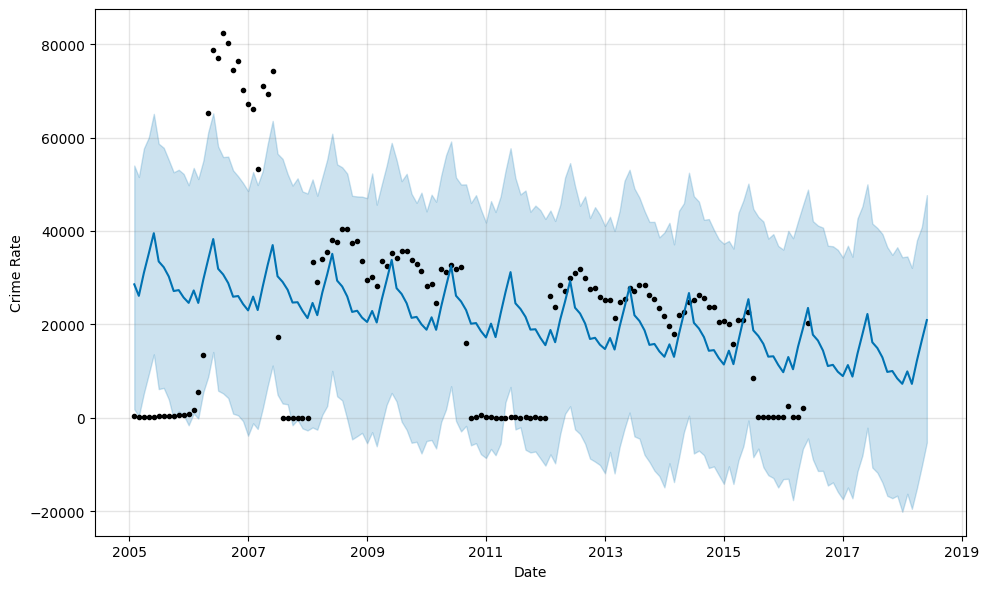

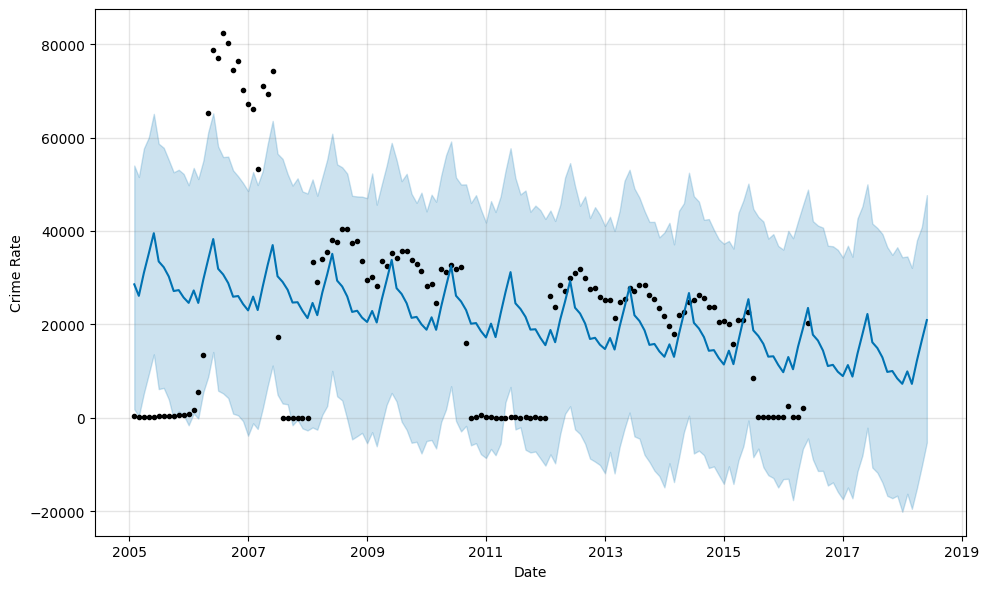

In [42]:
m.plot(forcast,xlabel="Date",ylabel="Crime Rate")

**Save The Model**

In [43]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [44]:
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))  # Load model

C:\Users\Ravi\anaconda3\lib\site-packages\prophet\serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [45]:
x = int(input("Enter Numbers Months to forecast"))

Enter Numbers Months to forecast24


In [46]:
pred = m1.make_future_dataframe(periods=x ,freq = "M")
forcast = m1.predict(pred)

In [47]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,30785.897153,1925.409566,53927.526426,30785.897153,30785.897153,-2217.459251,-2217.459251,-2217.459251,-2217.459251,-2217.459251,-2217.459251,0.0,0.0,0.0,28568.437902
1,2005-02-28,30678.578503,-34.666353,50323.912590,30678.578503,30678.578503,-4572.050308,-4572.050308,-4572.050308,-4572.050308,-4572.050308,-4572.050308,0.0,0.0,0.0,26106.528195
2,2005-03-31,30559.761426,4660.082743,55322.473116,30559.761426,30559.761426,472.911258,472.911258,472.911258,472.911258,472.911258,472.911258,0.0,0.0,0.0,31032.672684
3,2005-04-30,30444.777158,7602.396254,60467.997266,30444.777158,30444.777158,4707.893021,4707.893021,4707.893021,4707.893021,4707.893021,4707.893021,0.0,0.0,0.0,35152.670179
4,2005-05-31,30325.960081,14123.662455,66544.506004,30325.960081,30325.960081,9203.462661,9203.462661,9203.462661,9203.462661,9203.462661,9203.462661,0.0,0.0,0.0,39529.422742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2018-01-31,12044.682104,-16864.413557,37195.687734,12038.461934,12050.829545,-2127.826357,-2127.826357,-2127.826357,-2127.826357,-2127.826357,-2127.826357,0.0,0.0,0.0,9916.855747
157,2018-02-28,11933.634943,-16900.818389,32040.868806,11927.134021,11940.220326,-4690.629210,-4690.629210,-4690.629210,-4690.629210,-4690.629210,-4690.629210,0.0,0.0,0.0,7243.005733
158,2018-03-31,11810.689871,-15247.583030,39306.629270,11803.571956,11817.725147,415.580951,415.580951,415.580951,415.580951,415.580951,415.580951,0.0,0.0,0.0,12226.270822
159,2018-04-30,11691.710769,-9108.119374,42605.475938,11684.033973,11699.275090,4875.913882,4875.913882,4875.913882,4875.913882,4875.913882,4875.913882,0.0,0.0,0.0,16567.624651


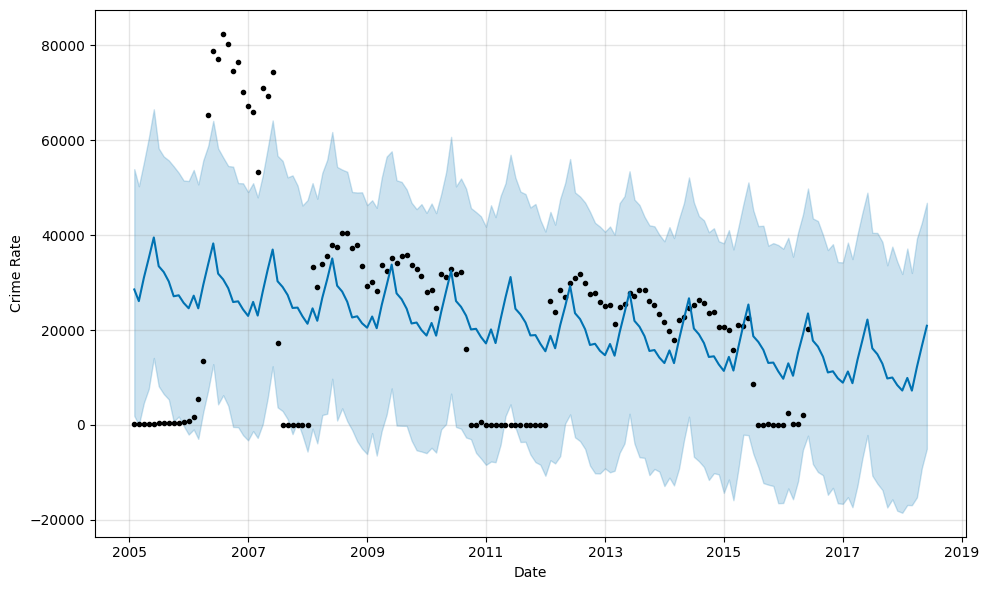

In [48]:
figure = m1.plot(forcast, xlabel='Date', ylabel='Crime Rate')

**Time Series Visualization with Trend and Seasonality:**

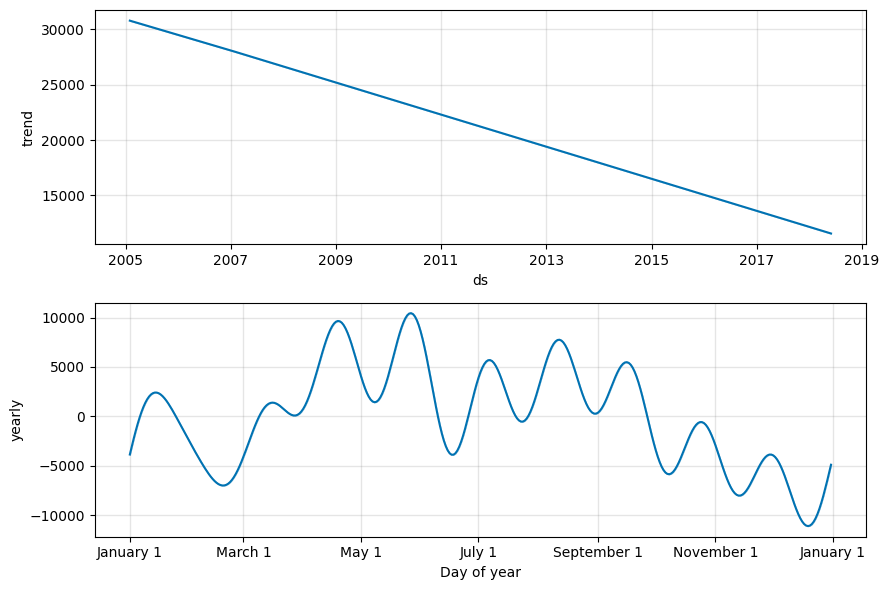

In [51]:
m.plot_components(forcast)
plt.show()
